<a href="https://colab.research.google.com/github/PySaeid256/gold-price-prediction/blob/main/M516_Final_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GOLD PRICE PREDICTION

install libraries

In [42]:
pip install yfinance pandas scikit-learn matplotlib


import libraries

In [64]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Importing libraries and downloading data

In [65]:
import yfinance as yf


data = yf.download('GLD', start='2010-01-01', end='2025-06-25')
data = data[['Close']]
data.dropna(inplace=True)




[*********************100%***********************]  1 of 1 completed


Create sliding window features

In [69]:
window_size = 5
X = []
y = []

prices = data['Close'].values

for i in range(len(prices) - window_size):
    X.append(prices[i:i+window_size])
    y.append(prices[i+window_size])

X = np.array(X)
y = np.array(y)

 Reshape X to 2D (samples, features) for LinearRegression, Train Linear Regression model

In [68]:
# Ensure X is 2D before fitting
X_reshaped = X.reshape(X.shape[0], -1)

model = LinearRegression()
model.fit(X_reshaped, y)

LinearRegression()

Predict future prices

In [71]:
n_days = 300

last_window = list(prices[-window_size:])
future_predictions = []

for _ in range(n_days):
    input_data = np.array(last_window[-window_size:]).reshape(1, -1)  # reshape to 2D
    pred = model.predict(input_data)[0]
    future_predictions.append(pred)
    last_window.append(pred)

Generate future business dates

In [72]:
last_date = data.index[-1]
future_dates = pd.bdate_range(start=last_date, periods=n_days + 1, freq='B')[1:]

Create DataFrame with predictions



In [78]:
future_df = pd.DataFrame({'Predicted_Close': future_predictions}, index=future_dates)

Plot historical and predicted prices

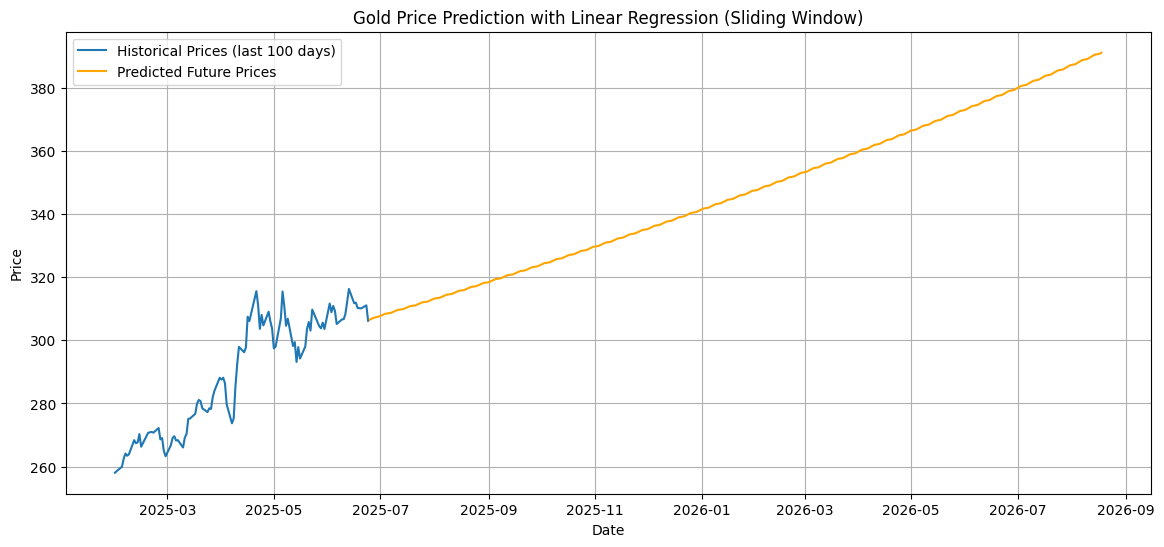

In [74]:
plt.figure(figsize=(14, 6))
plt.plot(data.index[-100:], data['Close'].values[-100:], label='Historical Prices (last 100 days)')
plt.plot(future_df.index, future_df['Predicted_Close'], label='Predicted Future Prices', color='orange')
plt.title('Gold Price Prediction with Linear Regression (Sliding Window)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Print final predicted price

In [77]:
final_price = future_df.iloc[-1]['Predicted_Close']
final_date = future_df.index[-1].date()
print(f"📅 Final predicted price on {final_date}: ${float(final_price):.2f}")


📅 Final predicted price on 2026-08-18: $391.15


In [90]:
data.to_csv('gold_price_data.csv')
